# Final Project: Some Visualizations

Victoria Eastman, David Harding, and Faria Mardhani

https://www.kaggle.com/c/sf-crime

Interesting things:
   - distance?
   - time of day
   
Things already tried and since removed:
   - KNN 


In [3]:
%matplotlib inline

# General libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
# Read in zipped data file
zf = zipfile.ZipFile('train.csv.zip', 'r')
train_raw = pd.read_csv(zf.open('train.csv'), parse_dates=['Dates'])

zf2 = zipfile.ZipFile('test.csv.zip', 'r')
test_raw = pd.read_csv(zf2.open('test.csv'), parse_dates=['Dates'])

In [5]:
# Read in the raw csv
#df = pd.read_csv('train.csv', parse_dates=[0])
#df.head()

In [6]:
train_raw.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [14]:
def process_data(df):
    df['DOW'] = df.Dates.dt.weekday
    df['DOM'] = df.Dates.dt.day
    df['MONTH'] = df.Dates.dt.month
    df['Hour'] = df.Dates.dt.hour
    df['MINUTE'] = df.Dates.dt.minute
    
    #df = df.drop(['Descript', 'Resolution'], axis=1)

    df_PdD = pd.get_dummies(df.PdDistrict)
    df_DOM = pd.get_dummies(df.DOM, prefix = 'DofM')
    df_DOW = pd.get_dummies(df.DOW, prefix = 'DofW')
    df_MONTH = pd.get_dummies(df.MONTH, prefix = 'Month')
    df_Hour = pd.get_dummies(df.Hour, prefix = 'Hour')
    df_Minute = pd.get_dummies(df.Hour, prefix = 'Minute')

    new = pd.concat([df_PdD, df_DOM], axis = 1)
    new = pd.concat([new, df_DOW], axis = 1)
    new = pd.concat([new, df_MONTH], axis = 1)
    new = pd.concat([new, df_Hour], axis = 1)
    new = pd.concat([new, df_Minute], axis = 1)
    
    return new

In [15]:
df_label = train_raw['Category'].astype('category')
newdf = process_data(train_raw)
X_train, X_dev, y_train, y_dev = train_test_split(newdf, df_label, test_size = 0.5, random_state= 42)

In [16]:
print("X_train size: " + str(X_train.shape))
print("X_dev size: " + str(X_dev.shape))
print("y_train size: " + str(y_train.shape))
print("y_dev size: " + str(y_dev.shape))

X_train size: (439024, 108)
X_dev size: (439025, 108)
y_train size: (439024,)
y_dev size: (439025,)


In [17]:
df=train_raw.copy()

cats = pd.Series(df.Category.values.ravel()).unique()
cats.sort()
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DOW,DOM,MONTH,Hour,MINUTE
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2,13,5,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2,13,5,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2,13,5,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2,13,5,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2,13,5,23,30


Text(0.5,1,u'Occurance by Time and Day - All Categories')

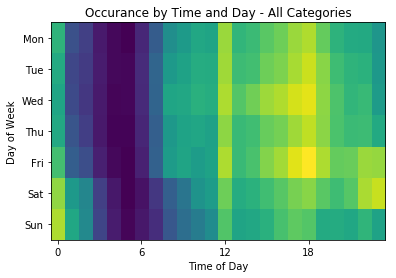

In [18]:
### By Hour

plt.figure(1,figsize=(6,4))
plt.hist2d(
    df.Hour.values,
    df.DOW.values,
    bins=[24,7],
    range=[[-0.5,23.5],[-0.5,6.5]]
)
plt.xticks(np.arange(0,24,6))
plt.xlabel('Time of Day')
plt.yticks(np.arange(0,7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Day of Week')
plt.gca().invert_yaxis()
plt.title('Occurance by Time and Day - All Categories')

In [19]:
len(cats)

39

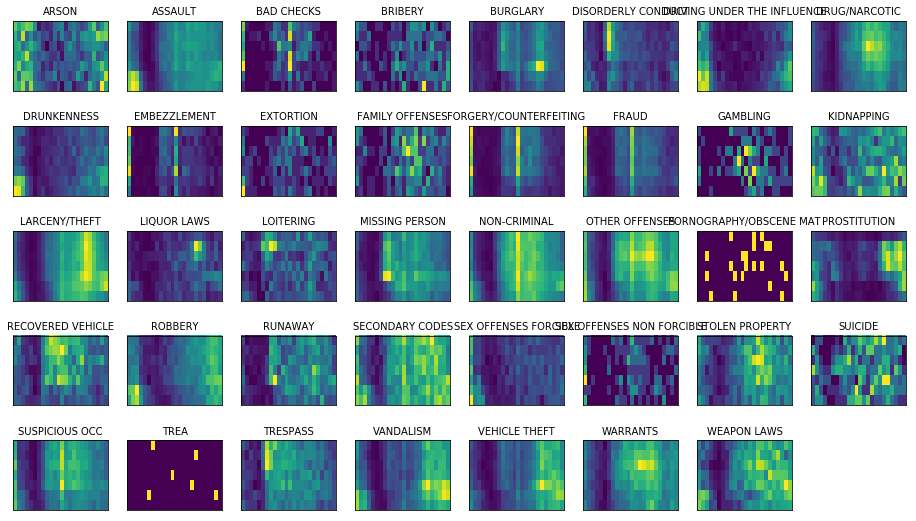

In [20]:
plt.figure(2,figsize=(16,9))
plt.subplots_adjust(hspace=0.5)
for i in np.arange(1,len(cats) + 1):
    ax = plt.subplot(5,8,i)
    ax.set_title(cats[i - 1],fontsize=10)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.hist2d(
        df[df.Category==cats[i - 1]].Hour.values,
        df[df.Category==cats[i - 1]].DOW.values, 
        bins=[24,7],
        range=[[-0.5,23.5],[-0.5,6.5]]
    )
    plt.gca().invert_yaxis()

Text(0.5,1,u'Occurance by Time and Day - All Categories')

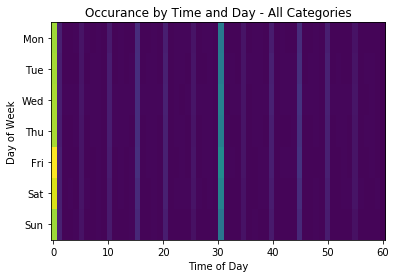

In [25]:
## By Minute

plt.figure(1,figsize=(6,4))
plt.hist2d(
    df.MINUTE.values,
    df.DOW.values,
    bins=[60,7],
    range=[[-0.5,60.5],[-0.5,6.5]]
)
plt.xticks(np.arange(0,70,10))
plt.xlabel('Time of Day')
plt.yticks(np.arange(0,7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Day of Week')
plt.gca().invert_yaxis()
plt.title('Occurance by Time and Day - All Categories')

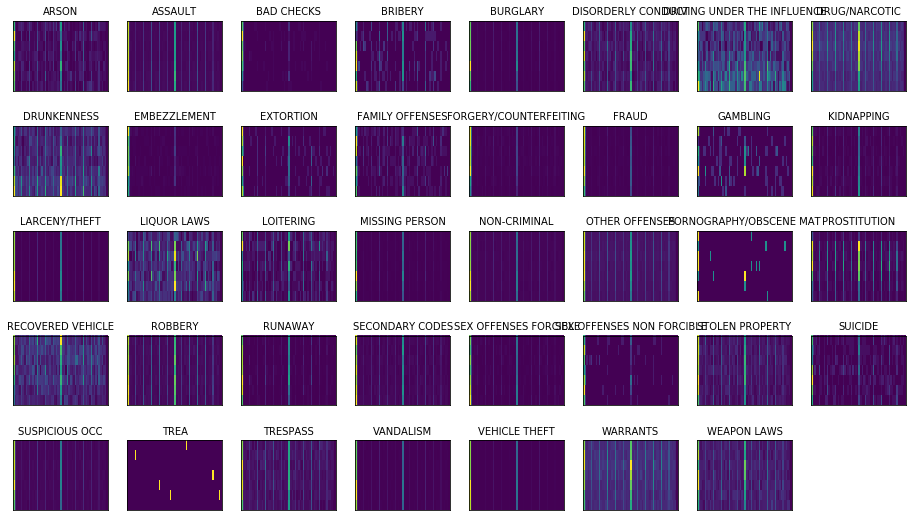

In [26]:
plt.figure(2,figsize=(16,9))
plt.subplots_adjust(hspace=0.5)
for i in np.arange(1,len(cats) + 1):
    ax = plt.subplot(5,8,i)
    ax.set_title(cats[i - 1],fontsize=10)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.hist2d(
        df[df.Category==cats[i - 1]].MINUTE.values,
        df[df.Category==cats[i - 1]].DOW.values, 
        bins=[60,7],
        range=[[-0.5,60.5],[-0.5,6.5]]
    )
    plt.gca().invert_yaxis()